In [78]:
import pandas as pd 
import numpy as np 
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [79]:
df = pd.read_csv('/Users/saudahmad/Desktop/DM_lab/SM_data.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


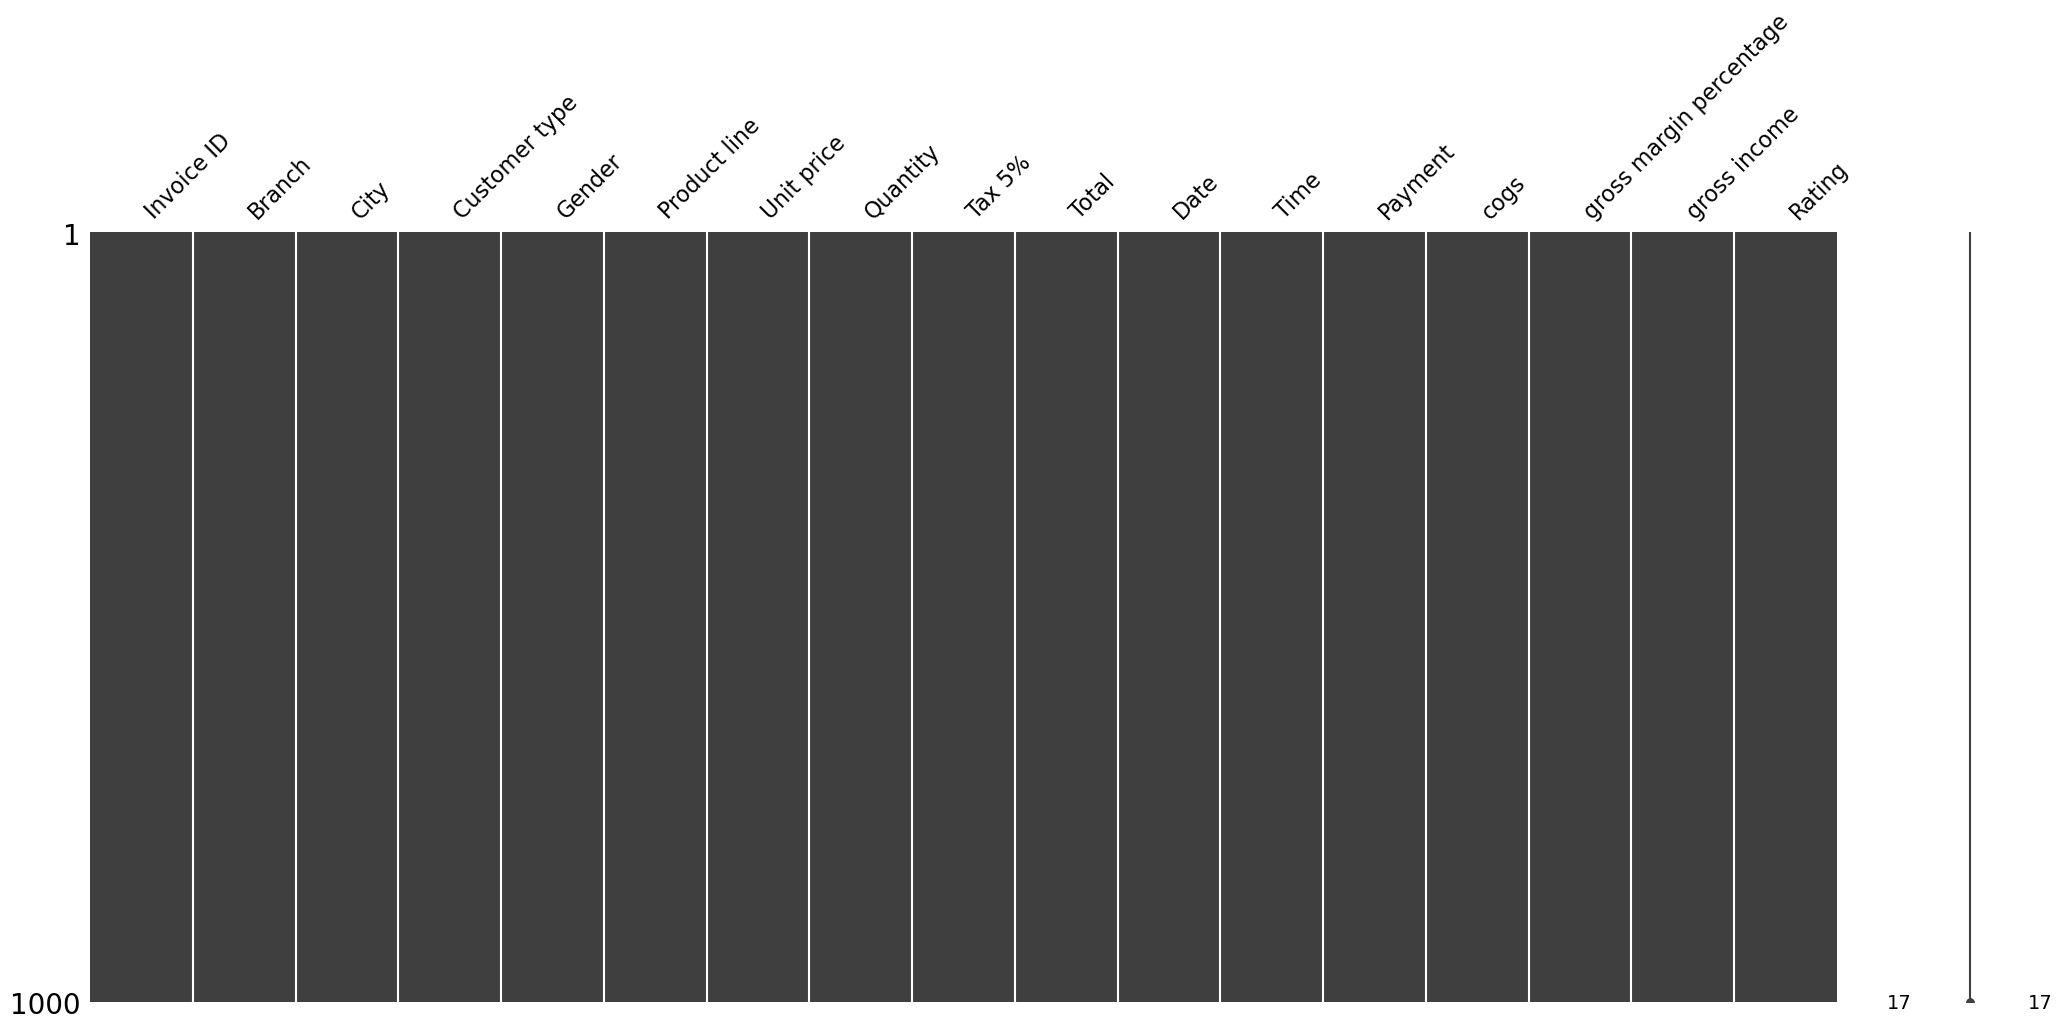

In [152]:
msno.matrix(df)
plt.show()

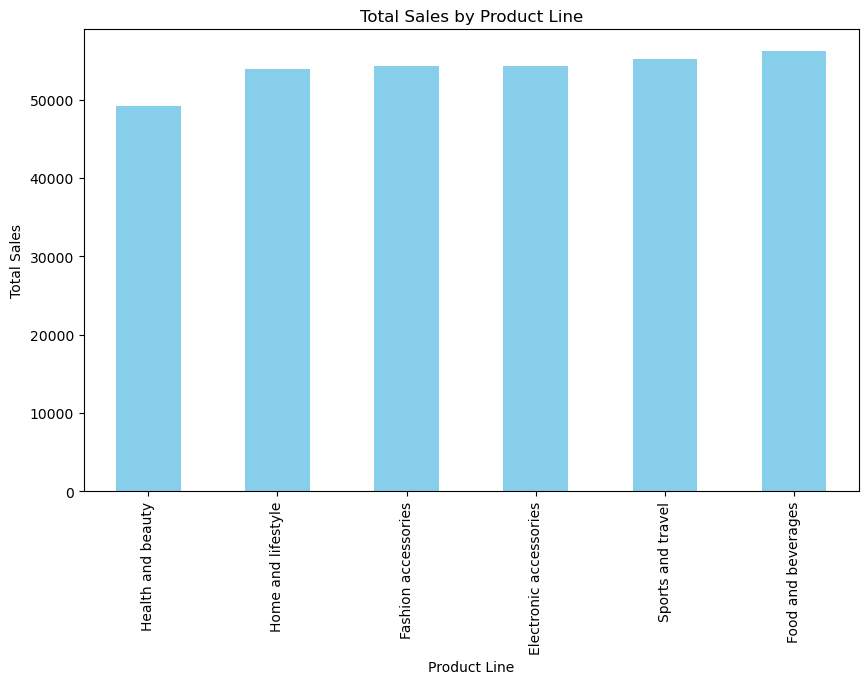

In [111]:
#Sales Analysis by Product Line
sales_by_product_line = df.groupby('Product line')['Total'].sum().sort_values()
# Plot the bar chart
plt.figure(figsize=(10, 6))
sales_by_product_line.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

In [173]:
ss = df.groupby('Product line')['Total']
ss.sum().sort_values()

Product line
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Fashion accessories       54305.8950
Electronic accessories    54337.5315
Sports and travel         55122.8265
Food and beverages        56144.8440
Name: Total, dtype: float64

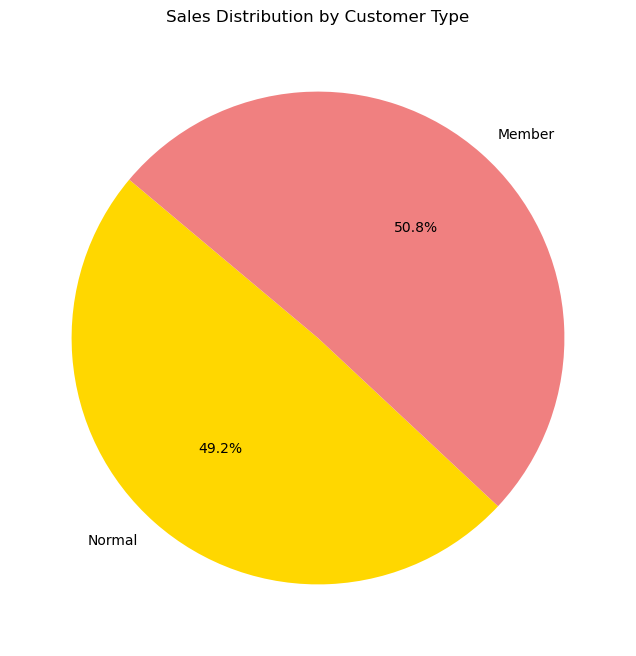

In [127]:
sales_by_customer_type = df.groupby('Customer type')['Total'].sum().sort_values()
# Plot the pie chart
plt.figure(figsize=(8, 8))
sales_by_customer_type.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral'])
plt.title('Sales Distribution by Customer Type')
plt.ylabel('')
plt.show()

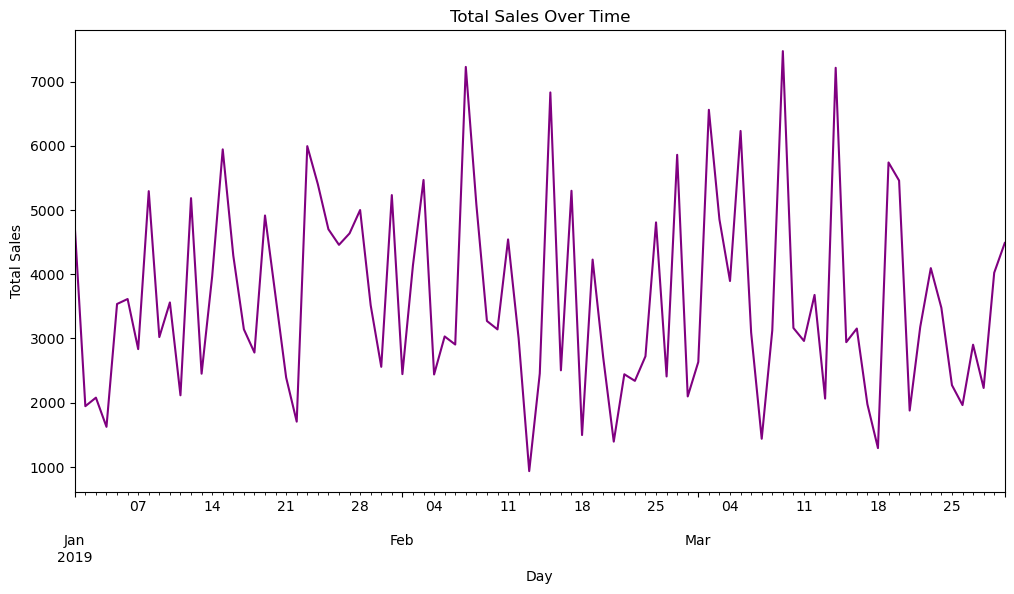

In [137]:
df['Date'] = pd.to_datetime(df['Date'])

# Group by day and calculate total sales
daily_sales = df.set_index('Date').resample('d')['Total'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
daily_sales.plot(color='purple')
plt.title('Total Sales Over Time')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.show()

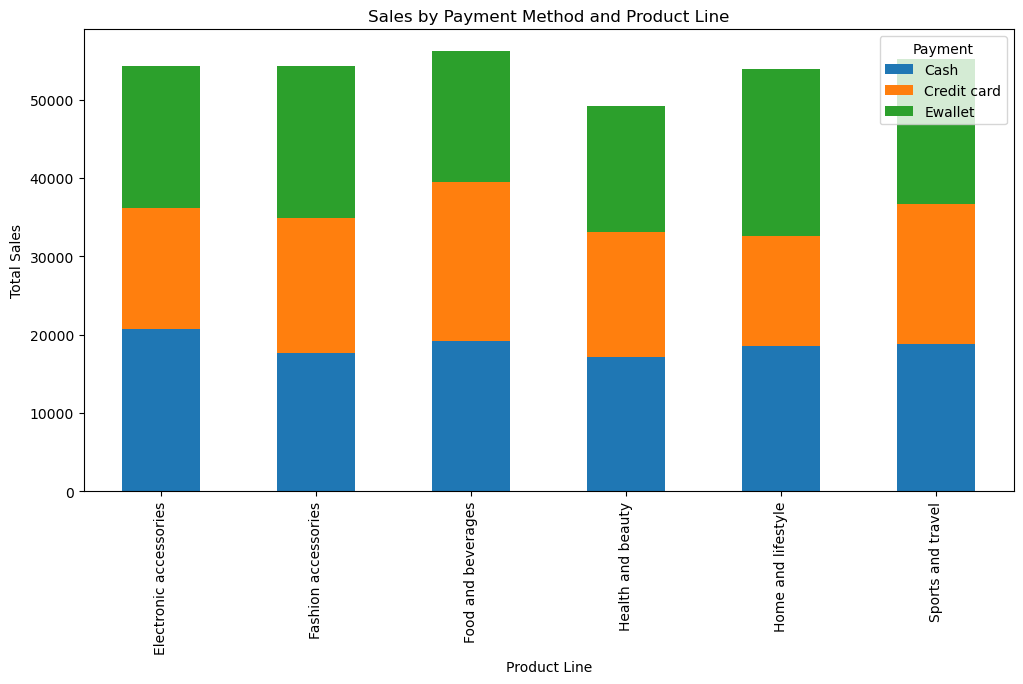

In [138]:
sales_by_payment_product_line = df.pivot_table(values='Total', index='Product line', columns='Payment', aggfunc='sum')

# Plot the stacked bar chart
sales_by_payment_product_line.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sales by Payment Method and Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

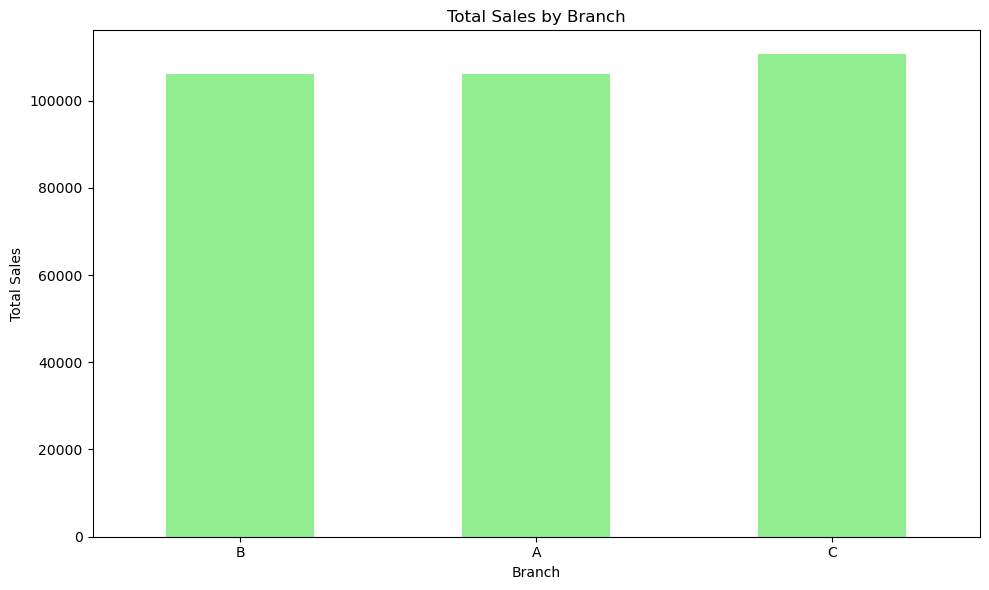

('C', 'B')

In [139]:
# Calculate total sales by branch
sales_by_branch = df.groupby('Branch')['Total'].sum().sort_values()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sales_by_branch.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Identify the best and worst performing branches
best_branch = sales_by_branch.idxmax()
worst_branch = sales_by_branch.idxmin()

best_branch, worst_branch


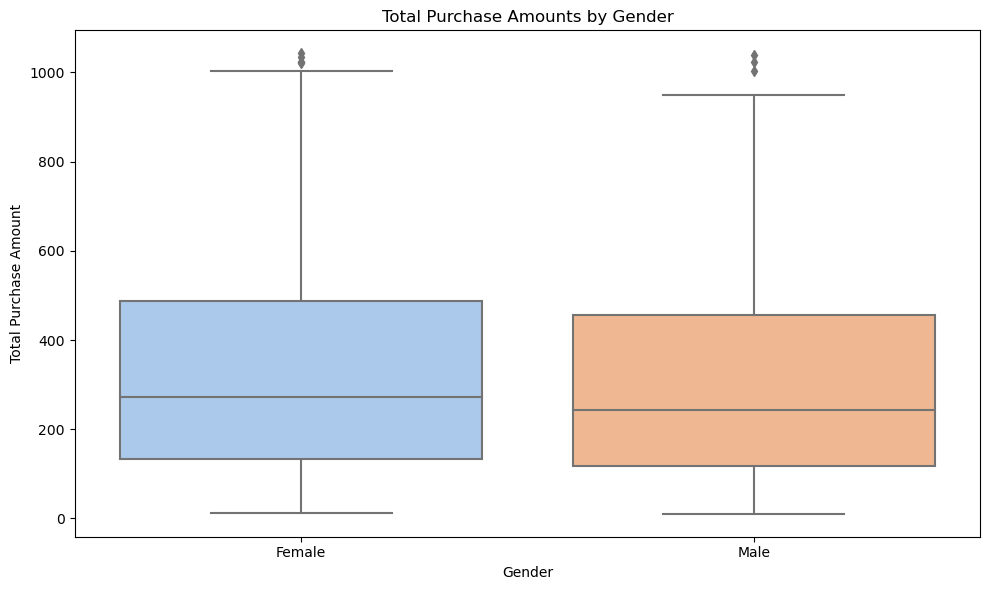

In [141]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Total', data=df, palette='pastel')
plt.title('Total Purchase Amounts by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.tight_layout()
plt.show()

/var/folders/wl/nj0lsj9j7p5d9n013793d8vh0000gn/T/ipykernel_2674/1951820789.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


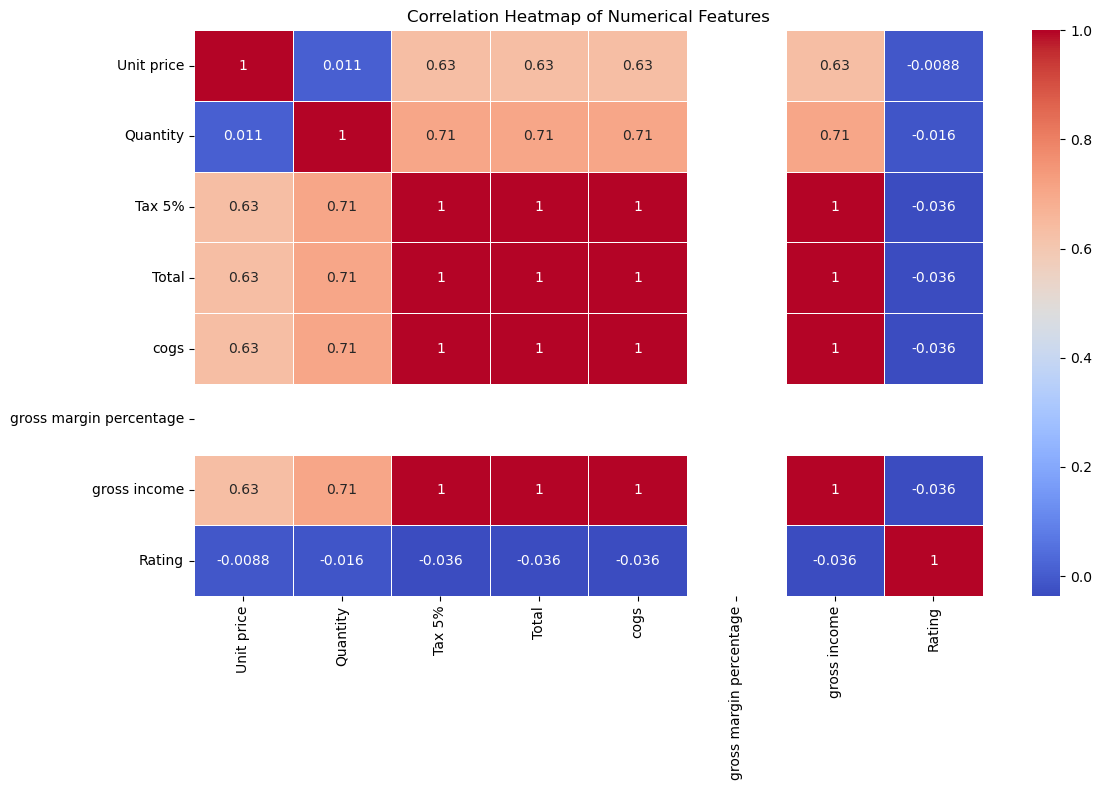

,Feature1,Feature2,Correlation
0,Unit price,Tax 5%,0.633962
1,Unit price,Total,0.633962
2,Unit price,cogs,0.633962
3,Unit price,gross income,0.633962
4,Quantity,Tax 5%,0.705510
5,Quantity,Total,0.705510
6,Quantity,cogs,0.705510
7,Quantity,gross income,0.705510
8,Tax 5%,Unit price,0.633962
9,Tax 5%,Quantity,0.705510


In [143]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Identify strong correlations (absolute value > 0.5)
strong_correlations = corr_matrix[(corr_matrix.abs() > 0.5) & (corr_matrix != 1.0)].stack().reset_index()
strong_correlations.columns = ['Feature1', 'Feature2', 'Correlation']

strong_correlations

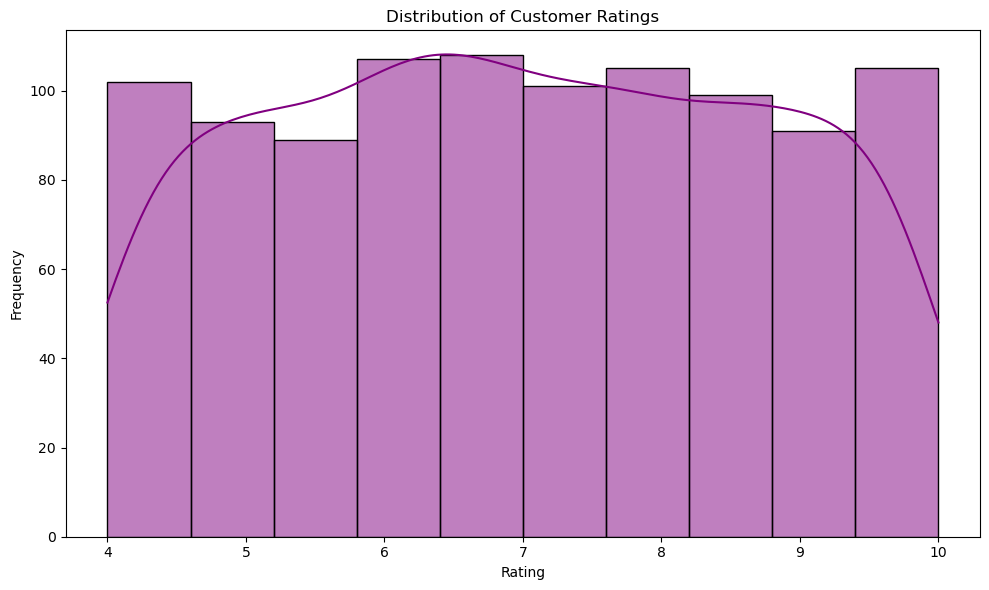

In [144]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='purple')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

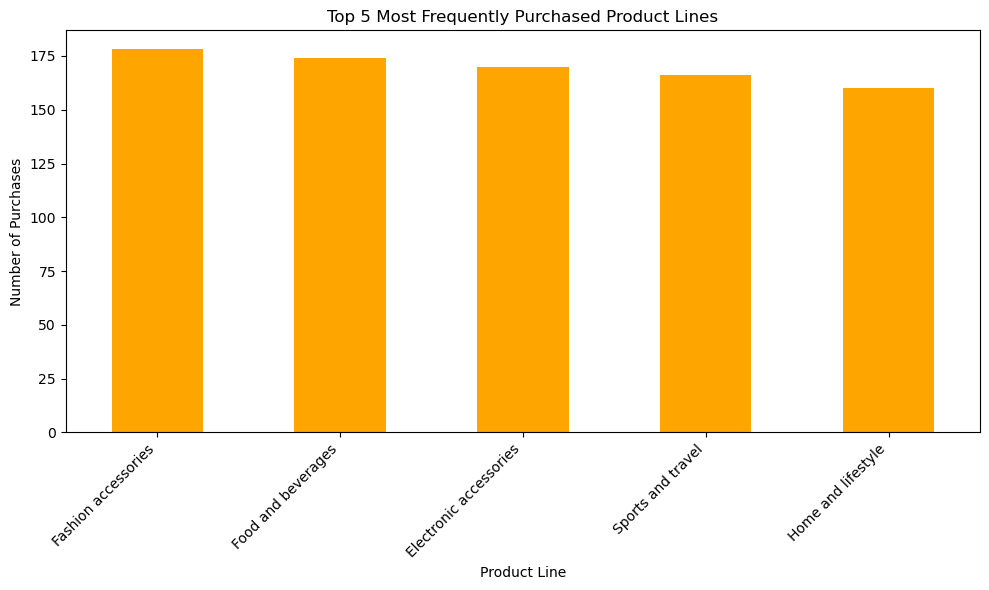

In [145]:
product_line_counts = df['Product line'].value_counts().head(5)

# Plot the bar chart
plt.figure(figsize=(10, 6))
product_line_counts.plot(kind='bar', color='orange')
plt.title('Top 5 Most Frequently Purchased Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

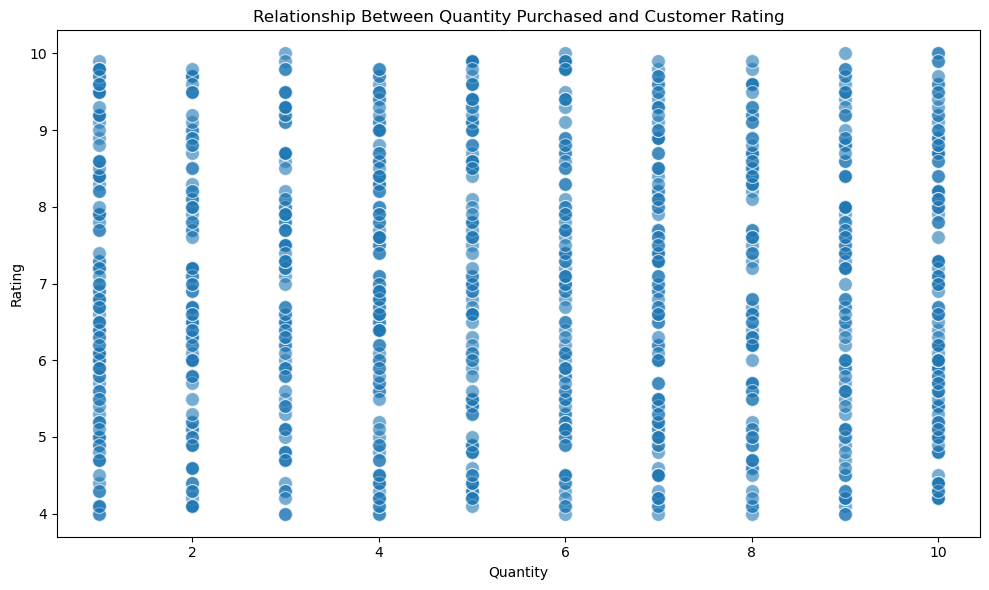

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Rating', data=df, alpha=0.6, s=100)
plt.title('Relationship Between Quantity Purchased and Customer Rating')
plt.xlabel('Quantity')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

In [147]:
new_df = df[['Branch','City','Product line']]

# Convert DataFrame to a list of transactions
transactions = new_df.apply(lambda row: row.tolist(), axis=1).tolist()

# Using TransactionEncoder to transform the list of transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)
transaction_df

,A,B,C,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Mandalay,Naypyitaw,Sports and travel,Yangon
0,True,False,False,False,False,False,True,False,False,False,False,True
1,False,False,True,True,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,False,True,False,False,False,True
3,True,False,False,False,False,False,True,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,True,False,False,False,True,False,False,True,False,False
996,False,True,False,False,False,False,False,True,True,False,False,False
997,True,False,False,False,False,True,False,False,False,False,False,True
998,True,False,False,False,False,False,False,True,False,False,False,True


In [148]:
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_df, min_support=0.34, use_colnames=True)
print(frequent_itemsets)


   support     itemsets
0     0.34          (A)
1     0.34     (Yangon)
2     0.34  (Yangon, A)


In [175]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Yangon),(A),0.34,0.34,0.34,1.0,2.941176,0.2244,inf,1.0
1,(A),(Yangon),0.34,0.34,0.34,1.0,2.941176,0.2244,inf,1.0


In [150]:
# Step 3: Applying FP-Growth Algorithm
# Apply the FP-Growth algorithm to find frequent itemsets
frequent_itemsets_fpgrowth = fpgrowth(transaction_df, min_support=0.34, use_colnames=True)


In [174]:
# Generate association rules from the frequent itemsets
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1)
print("FP-Growth Algorithm Results")
rules_fpgrowth

FP-Growth Algorithm Results


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Yangon),(A),0.34,0.34,0.34,1.0,2.941176,0.2244,inf,1.0
1,(A),(Yangon),0.34,0.34,0.34,1.0,2.941176,0.2244,inf,1.0


In [ ]:
crime dataset
